# 10. One vs All
An idea proposed by Jeroen Vuurens was to try out a one vs. all classifier. In this notebook, I'll attempt to get this to work. Firstly, I create a balanced, preprocessed dataframe.

In [18]:
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocessing import PreProcessor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

pp = PreProcessor()

df = pd.read_csv('Structured_DataFrame_Sample_500.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

df.head()

,Category,Item Description,category_id
40127,Counterfeits/Watches,emporio armani ar shell case ceram bracelet re...,0
40126,Counterfeits/Watches,cartiertank ladi brand cartier seri tank gende...,0
40125,Counterfeits/Watches,patek philipp watch box patek philipp watch bo...,0
40130,Counterfeits/Watches,breitl navitim cosmonaut replica watch inform ...,0
40129,Counterfeits/Watches,emporio armani men ar dial color gari watch re...,0


## Training the One vs All model with LinearSVC
Secondly, we train the one vs all classifier.

In [19]:
from sklearn.model_selection import train_test_split
import sys
import numpy

numpy.set_printoptions(threshold=sys.maxsize)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

vs = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train).predict(X_test) 
vs[:5]

array([ 3, 26, 20,  9, 14])

## Plotting the results
Then we plot the results in order to see how it performed.

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, vs))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       162
           1       0.90      0.90      0.90       147
           2       0.95      0.92      0.94       157
           3       0.84      0.87      0.86       166
           4       0.95      0.94      0.95       172
           5       0.98      0.98      0.98       162
           6       0.91      0.92      0.92       153
           7       0.97      0.95      0.96       149
           8       0.95      0.96      0.96       170
           9       0.90      0.93      0.91       174
          10       0.97      1.00      0.98       159
          11       0.99      0.92      0.95       182
          12       0.80      0.65      0.72       162
          13       0.94      0.96      0.95       165
          14       0.87      0.94      0.90       176
          15       0.89      0.91      0.90       170
          16       0.74      0.63      0.68       168
          17       0.93    

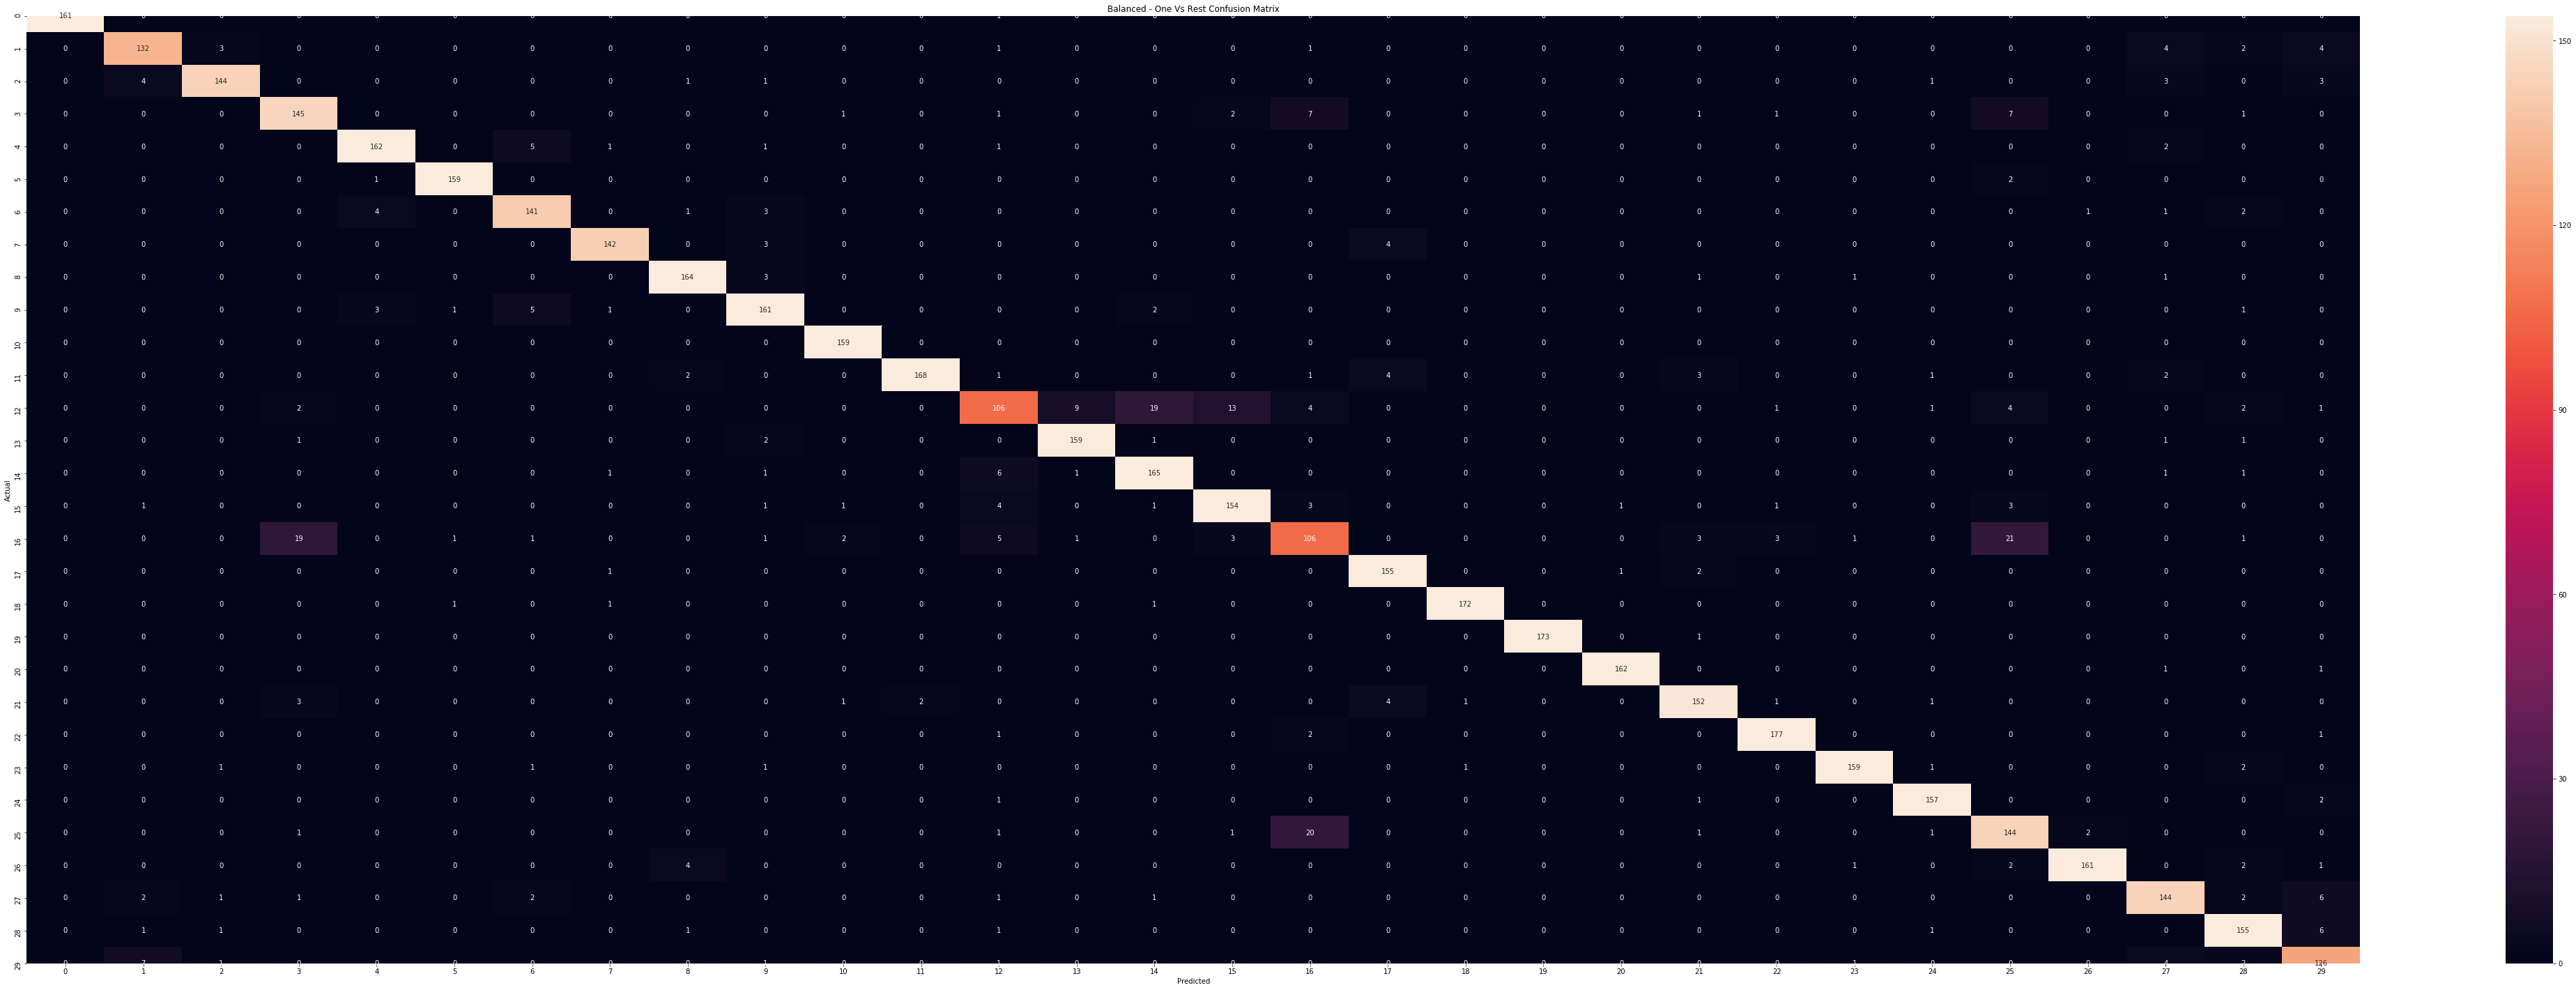

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(modelName, modelPrediction):
    conf_mat = confusion_matrix(y_test, modelPrediction)
    fig, ax = plt.subplots(figsize=(75,25))
    sns.heatmap(conf_mat, annot=True, fmt='d', robust=True)

    plt.title(modelName + " Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig('Confusion Matrix ' + modelName + '.png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix('Balanced - One Vs Rest', vs)

## Using the complete, unbalanced dataset
Now let's see what the results are in an unbalanced dataset with all categories.

In [22]:
df = pd.read_csv('Structured_DataFrame_All_Categories.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

df.head()

,Category,Item Description,category_id
0,Services/Hacking,month huluplu gift code month huluplu code wor...,0
1,Services/Hacking,pay tv sky uk sky germani hd tv much cccam ser...,0
2,Services/Hacking,offici account creator extrem tag submiss fix ...,0
3,Services/Hacking,vpn tor sock tutori setup vpn tor sock super s...,0
4,Services/Hacking,facebook hack guid guid teach hack facebook ac...,0


In [23]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

vs = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train).predict(X_test) 
vs[:5]

array([ 8, 16, 24, 24,  9])

In [24]:
print(classification_report(y_test, vs))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58       152
           1       0.40      0.32      0.36       154
           2       0.92      0.91      0.91       720
           3       0.88      0.89      0.88       189
           4       0.98      0.93      0.95       127
           5       0.63      0.73      0.68       450
           6       0.92      0.89      0.90       123
           7       0.74      0.75      0.74       119
           8       0.78      0.79      0.78       378
           9       0.90      0.91      0.90       132
          10       0.40      0.42      0.41       319
          11       0.73      0.81      0.77       192
          12       0.80      0.74      0.77        70
          13       0.74      0.68      0.70        74
          14       0.84      0.81      0.82       178
          15       0.96      0.96      0.96       941
          16       0.81      0.81      0.81      1837
          17       0.39    

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


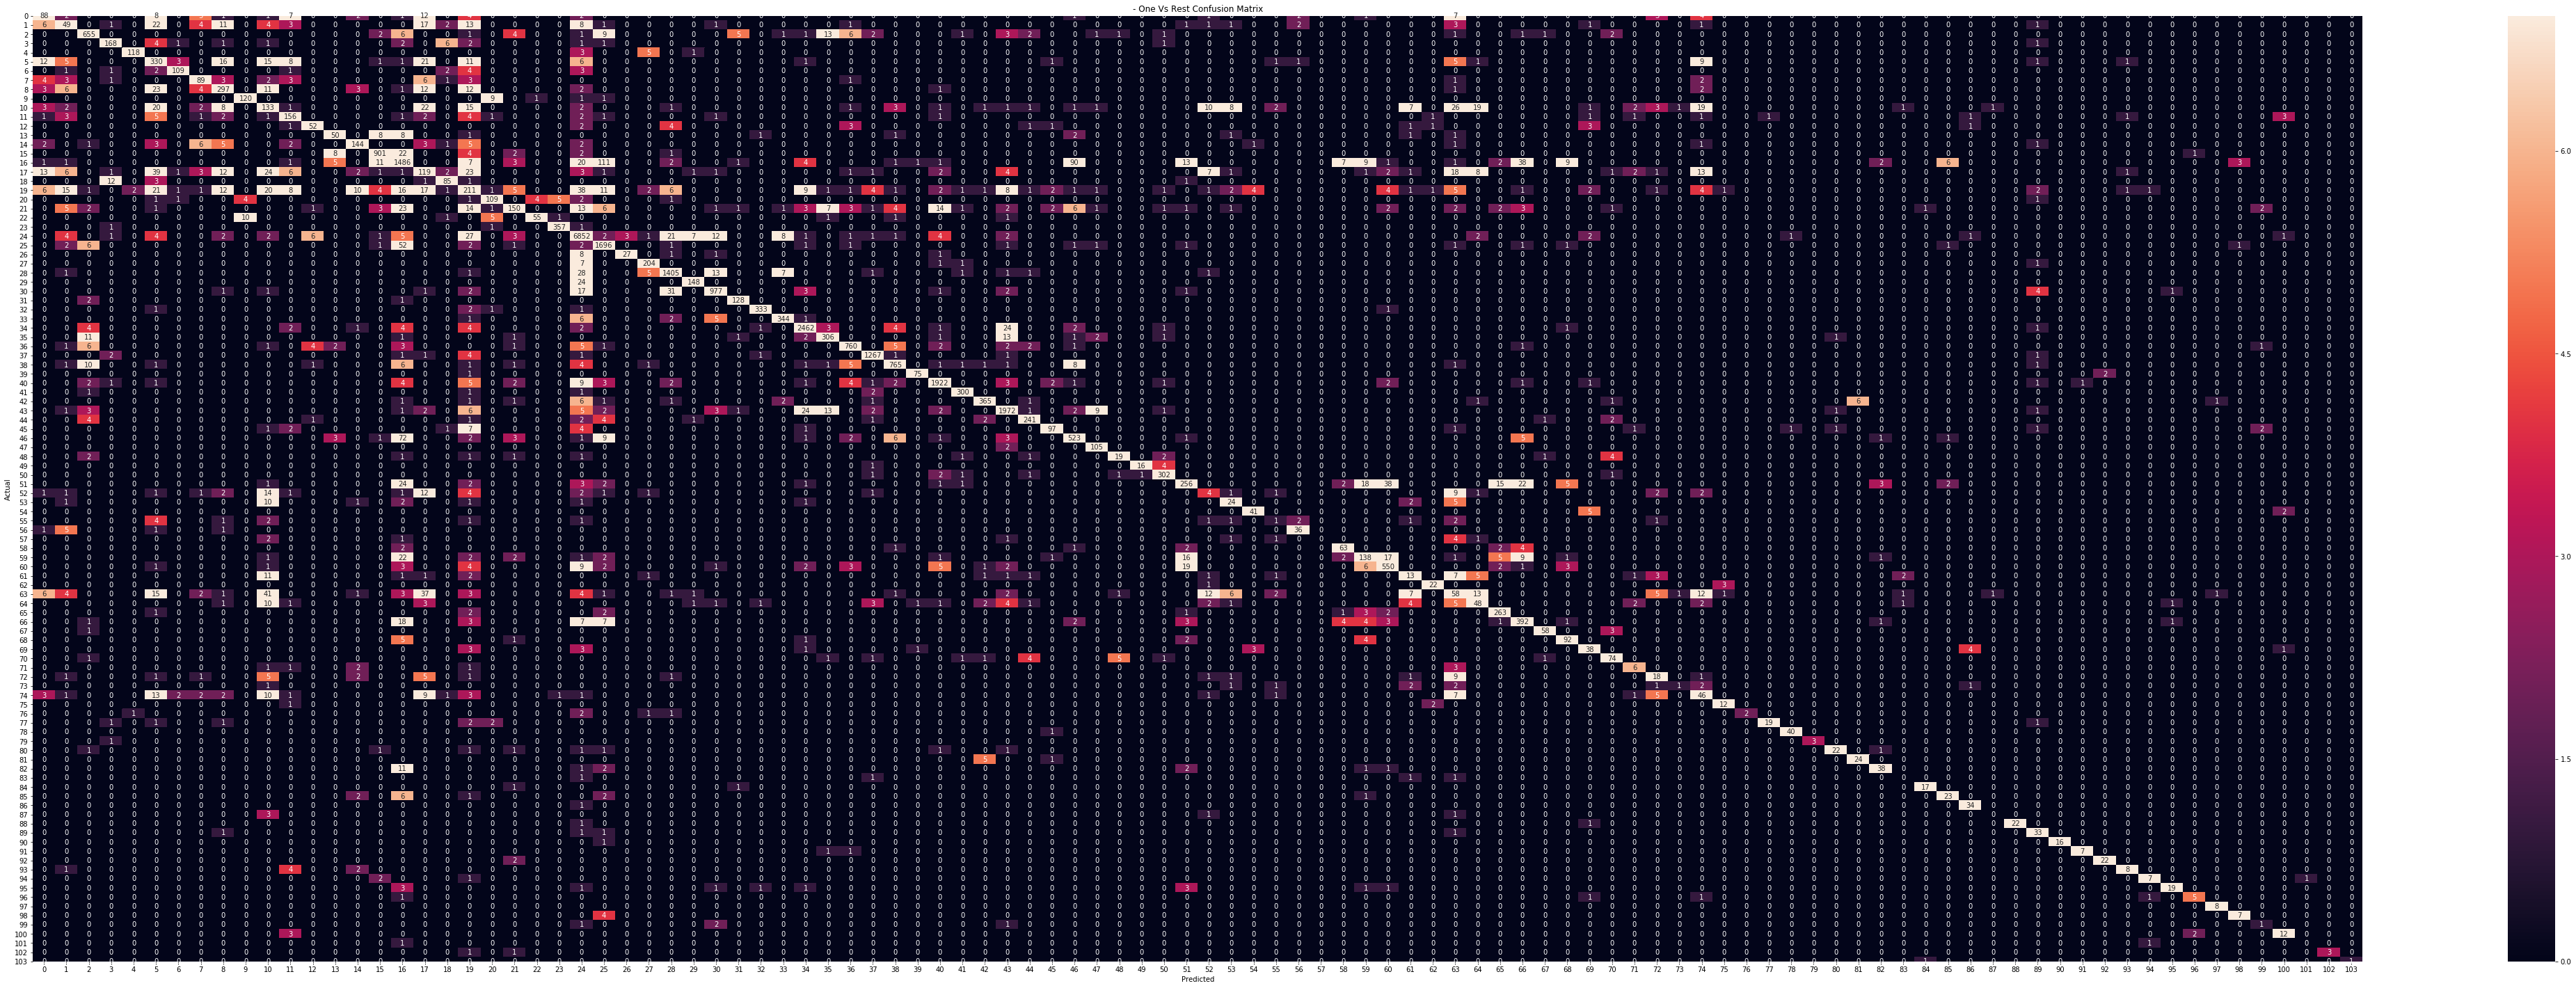

In [25]:
plot_confusion_matrix('- One Vs Rest', vs)